房价预测python+numpy实现

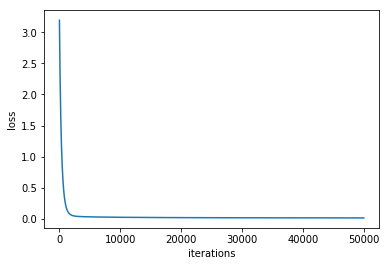

In [17]:
from sklearn.datasets import load_boston 
import numpy as np
import matplotlib.pyplot as plt
def load_data():   
    datafile = './data/housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 2.将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 3.将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算train数据集的最大值，最小值，平均值
    maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), \
                                 training_data.sum(axis=0) / training_data.shape[0]

    # 4.对数据进行归一化处理
    for i in range(feature_num):
        #print(maximums[i], minimums[i], avgs[i])
        data[:, i] = (data[:, i] - avgs[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data


class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)       
        self.n_hidden = 10
        self.w1 = np.random.randn(num_of_weights,10)  # 设置随机的权重
        self.b1 = np.zeros(10)  # 这里偏置为0
        self.w2 = np.random.rand(10,1)  # 这里因为输出只有一个模型，所以输出维度为1
        self.b2 = np.zeros(1)
                   
    def Relu(self,x):
        return np.where(x < 0,0,x)
    
    def MSE_loss(self, y,y_pred):
        return np.mean(np.square(y_pred - y))
        
    def Linear(self,x,w,b):
        z = x.dot(w) + b
        return z
    
    def back_gradient(self, y_pred, y,s1,l1):
        grad_y_pred = 2.0 * (y_pred - y)
        grad_w2 = s1.T.dot(grad_y_pred)
        grad_temp_relu = grad_y_pred.dot(self.w2.T)
        grad_temp_relu[l1 < 0] = 0
        grad_w1 = x.T.dot(grad_temp_relu) 
        return grad_w1, grad_w2
    
    def update(self, grad_w1,grad_w2,learning_rate):
        self.w1 -= learning_rate * grad_w1
        self.w2 -= learning_rate * grad_w2      
            
    def train(self, x, y, iterations, learning_rate):
        losses = []  # 记录每次迭代损失值
        for t in range(num_iterations):
            # 前向传播
            l1 = self.Linear(x,self.w1,self.b1)
            s1 = self.Relu(l1)
            y_pred = self.Linear(s1,self.w2,self.b2)
            # 计算损失函数
            loss = self.MSE_loss(y,y_pred)
            losses.append(loss)
            # 反向传播
            grad_w1,grad_w2 = self.back_gradient(y_pred, y,s1,l1)
            # 权重更新
            self.update(grad_w1,grad_w2,learning_rate)          
        return losses
        
# 获取数据
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]

# 创建网络
net = Network(13)
num_iterations=50000
# 启动训练
losses = net.train(x,y, iterations = num_iterations, learning_rate = 1e-6)

# 画出损失函数的变化趋势    
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(plot_x, plot_y)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()
#print('w1 = {}\n w2 = {}'.format(w1,w2))

